In [47]:
using Pkg
Pkg.activate(".")

  Activating project at `~/Documents/Projects/pfdelta/data_generation`


In [2]:
import PowerModels
import PowerModels: ref, var, ids
const PM = PowerModels
import JuMP
import Ipopt
import JSON
include("src/build_opf_pfdelta.jl")
include("src/pf_delta_perturbations.jl")

sample_ball (generic function with 1 method)

In [3]:
# Look at weird sample
sample_path = "pglib/pglib_opf_case5_pjm.m"
# sample_data = JSON.parsefile(sample_path)
# network = sample_data["network"]
network = PM.parse_matpower(sample_path)
network["gen"]["1"]["gen_status"] = 0 
results = PM.compute_ac_pf(network, flat_start=true)

[info | PowerModels]: extending matpower format with data: areas 1x3
[info | PowerModels]: removing 1 cost terms from generator 4: [4000.0, 0.0]
[info | PowerModels]: removing 1 cost terms from generator 1: [1400.0, 0.0]
[info | PowerModels]: removing 1 cost terms from generator 5: [1000.0, 0.0]
[info | PowerModels]: removing 1 cost terms from generator 2: [1500.0, 0.0]
[info | PowerModels]: removing 1 cost terms from generator 3: [3000.0, 0.0]


Dict{String, Any} with 6 entries:
  "optimizer"          => "NLsolve"
  "iterations"         => 3
  "termination_status" => true
  "objective"          => 0.0
  "solution"           => Dict{String, Any}("gen"=>Dict{String, Any}("4"=>Dict(…
  "solve_time"         => 0.603503

In [6]:
network["gen"]["1"]

Dict{String, Any} with 17 entries:
  "vg"         => 1.0
  "mbase"      => 100.0
  "source_id"  => Any["gen", 1]
  "pg"         => 0.2
  "model"      => 2
  "shutdown"   => 0.0
  "startup"    => 0.0
  "index"      => 1
  "cost"       => [1400.0, 0.0]
  "qg"         => 0.0
  "qmax"       => 0.3
  "gen_status" => 0
  "qmin"       => -0.3
  "gen_bus"    => 1
  "pmax"       => 0.4
  "pmin"       => 0.0
  "ncost"      => 2

In [8]:
results["solution"]["gen"]

Dict{String, Any} with 4 entries:
  "4" => Dict("qg"=>1.39075, "pg"=>3.57663)
  "5" => Dict("qg"=>-0.290209, "pg"=>3.0)
  "2" => Dict("qg"=>0.356144, "pg"=>0.85)
  "3" => Dict("qg"=>2.01987, "pg"=>2.6)

In [9]:
PM.update_data!(network, results["solution"])
network

Dict{String, Any} with 14 entries:
  "bus"            => Dict{String, Any}("4"=>Dict{String, Any}("zone"=>1, "bus_…
  "source_type"    => "matpower"
  "name"           => "pglib_opf_case5_pjm"
  "dcline"         => Dict{String, Any}()
  "source_version" => "2"
  "gen"            => Dict{String, Any}("4"=>Dict{String, Any}("vg"=>1.0, "mbas…
  "branch"         => Dict{String, Any}("4"=>Dict{String, Any}("br_r"=>0.00108,…
  "storage"        => Dict{String, Any}()
  "switch"         => Dict{String, Any}()
  "baseMVA"        => 100.0
  "per_unit"       => true
  "areas"          => Dict{String, Any}("1"=>Dict{String, Any}("source_id"=>Any…
  "shunt"          => Dict{String, Any}()
  "load"           => Dict{String, Any}("1"=>Dict{String, Any}("source_id"=>Any…

In [10]:
network["gen"]["1"]

Dict{String, Any} with 17 entries:
  "vg"         => 1.0
  "mbase"      => 100.0
  "source_id"  => Any["gen", 1]
  "pg"         => 0.2
  "model"      => 2
  "shutdown"   => 0.0
  "startup"    => 0.0
  "index"      => 1
  "cost"       => [1400.0, 0.0]
  "qg"         => 0.0
  "qmax"       => 0.3
  "gen_status" => 0
  "qmin"       => -0.3
  "gen_bus"    => 1
  "pmax"       => 0.4
  "pmin"       => 0.0
  "ncost"      => 2

In [3]:
# Experiment # 1: disconnect slack generator
slack_gen = "1"
net_exp1 = PM.parse_matpower("pglib/pglib_opf_case5_pjm.m")
net_exp1["gen"][slack_gen]["gen_status"] = 0
pm_default = PM.instantiate_model(net_exp1, PM.ACPPowerModel, PM.build_opf)
result_default = PM.optimize_model!(pm_default, optimizer=Ipopt.Optimizer)
result_default

[info | PowerModels]: extending matpower format with data: areas 1x3
[info | PowerModels]: removing 1 cost terms from generator 4: [4000.0, 0.0]
[info | PowerModels]: removing 1 cost terms from generator 1: [1400.0, 0.0]
[info | PowerModels]: removing 1 cost terms from generator 5: [1000.0, 0.0]
[info | PowerModels]: removing 1 cost terms from generator 2: [1500.0, 0.0]
[info | PowerModels]: removing 1 cost terms from generator 3: [3000.0, 0.0]

******************************************************************************
This program contains Ipopt, a library for large-scale nonlinear optimization.
 Ipopt is released as open source code under the Eclipse Public License (EPL).
         For more information visit https://github.com/coin-or/Ipopt
******************************************************************************

This is Ipopt version 3.13.4, running with linear solver mumps.
NOTE: Other linear solvers might be more efficient (see Ipopt documentation).

Number of nonzeros in

Dict{String, Any} with 8 entries:
  "solve_time"         => 1.07745
  "optimizer"          => "Ipopt"
  "termination_status" => LOCALLY_SOLVED
  "dual_status"        => FEASIBLE_POINT
  "primal_status"      => FEASIBLE_POINT
  "objective"          => 17680.2
  "solution"           => Dict{String, Any}("baseMVA"=>100.0, "branch"=>Dict{St…
  "objective_lb"       => -Inf

In [4]:
result_default["solution"]["gen"]

Dict{String, Any} with 4 entries:
  "4" => Dict{String, Any}("qg"=>-0.0495998, "pg"=>0.0)
  "5" => Dict{String, Any}("qg"=>-1.42235, "pg"=>4.96076)
  "2" => Dict{String, Any}("qg"=>1.275, "pg"=>1.7)
  "3" => Dict{String, Any}("qg"=>3.9, "pg"=>3.3898)

In [5]:
pm_our = PM.instantiate_model(net_exp1, PM.ACPPowerModel, build_opf_power_flow_delta)
result_our = PM.optimize_model!(pm_our, optimizer=Ipopt.Optimizer)
result_our

This is Ipopt version 3.13.4, running with linear solver mumps.
NOTE: Other linear solvers might be more efficient (see Ipopt documentation).

Number of nonzeros in equality constraint Jacobian...:      153
Number of nonzeros in inequality constraint Jacobian.:       24
Number of nonzeros in Lagrangian Hessian.............:      240

Total number of variables............................:       42
                     variables with only lower bounds:        1
                variables with lower and upper bounds:        7
                     variables with only upper bounds:        0
Total number of equality constraints.................:       35
Total number of inequality constraints...............:       12
        inequality constraints with only lower bounds:        6
   inequality constraints with lower and upper bounds:        0
        inequality constraints with only upper bounds:        6

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
   0  

Dict{String, Any} with 8 entries:
  "solve_time"         => 0.016619
  "optimizer"          => "Ipopt"
  "termination_status" => LOCALLY_SOLVED
  "dual_status"        => FEASIBLE_POINT
  "primal_status"      => FEASIBLE_POINT
  "objective"          => 12787.6
  "solution"           => Dict{String, Any}("baseMVA"=>100.0, "branch"=>Dict{St…
  "objective_lb"       => -Inf

In [6]:
result_default["solution"]["gen"]

Dict{String, Any} with 4 entries:
  "4" => Dict{String, Any}("qg"=>-0.0495998, "pg"=>0.0)
  "5" => Dict{String, Any}("qg"=>-1.42235, "pg"=>4.96076)
  "2" => Dict{String, Any}("qg"=>1.275, "pg"=>1.7)
  "3" => Dict{String, Any}("qg"=>3.9, "pg"=>3.3898)

In [7]:
pm = PM.instantiate_model(net, PM.ACPPowerModel, build_opf_power_flow_delta)
print(pm.model)

UndefVarError: UndefVarError: `net` not defined

In [8]:
result = PM.optimize_model!(pm, optimizer=Ipopt.Optimizer)

UndefVarError: UndefVarError: `pm` not defined

In [9]:
result["solution"]["gen"]

UndefVarError: UndefVarError: `result` not defined

In [10]:
# Experiment 2: disconnect graph
net_exp2 = PM.parse_matpower("pglib/pglib_opf_case5_pjm.m")
net_exp2["branch"]["1"]["br_status"] = 0
net_exp2["branch"]["4"]["br_status"] = 0
pm2_default = PM.instantiate_model(net_exp2, PM.ACPPowerModel, PM.build_opf)
result2_default = PM.optimize_model!(pm2_default, optimizer=Ipopt.Optimizer)
result2_default

[info | PowerModels]: extending matpower format with data: areas 1x3
[info | PowerModels]: removing 1 cost terms from generator 4: [4000.0, 0.0]
[info | PowerModels]: removing 1 cost terms from generator 1: [1400.0, 0.0]
[info | PowerModels]: removing 1 cost terms from generator 5: [1000.0, 0.0]
[info | PowerModels]: removing 1 cost terms from generator 2: [1500.0, 0.0]
[info | PowerModels]: removing 1 cost terms from generator 3: [3000.0, 0.0]
This is Ipopt version 3.13.4, running with linear solver mumps.
NOTE: Other linear solvers might be more efficient (see Ipopt documentation).

Number of nonzeros in equality constraint Jacobian...:      107
Number of nonzeros in inequality constraint Jacobian.:       32
Number of nonzeros in Lagrangian Hessian.............:      176

Total number of variables............................:       36
                     variables with only lower bounds:        0
                variables with lower and upper bounds:       31
                     va

Dict{String, Any} with 8 entries:
  "solve_time"         => 0.024632
  "optimizer"          => "Ipopt"
  "termination_status" => LOCALLY_INFEASIBLE
  "dual_status"        => UNKNOWN_RESULT_STATUS
  "primal_status"      => INFEASIBLE_POINT
  "objective"          => 12446.0
  "solution"           => Dict{String, Any}("baseMVA"=>100.0, "branch"=>Dict{St…
  "objective_lb"       => -Inf

In [11]:
result2_default["solution"]["branch"]

Dict{String, Any} with 4 entries:
  "5" => Dict{String, Any}("qf"=>0.282071, "qt"=>-0.283919, "pt"=>0.332074, "pf…
  "2" => Dict{String, Any}("qf"=>0.217922, "qt"=>-0.115812, "pt"=>-1.94318, "pf…
  "6" => Dict{String, Any}("qf"=>0.114344, "qt"=>0.0376218, "pt"=>2.39089, "pf"…
  "3" => Dict{String, Any}("qf"=>0.973776, "qt"=>-0.980758, "pt"=>1.86987, "pf"…

In [12]:
pm2_our = PM.instantiate_model(net_exp2, PM.ACPPowerModel, build_opf_power_flow_delta)
result2_our = PM.optimize_model!(pm2_default, optimizer=Ipopt.Optimizer)
result2_our

[warn | InfrastructureModels]: Model already contains optimizer, cannot use optimizer specified in `optimize_model!`
This is Ipopt version 3.13.4, running with linear solver mumps.
NOTE: Other linear solvers might be more efficient (see Ipopt documentation).

Number of nonzeros in equality constraint Jacobian...:      107
Number of nonzeros in inequality constraint Jacobian.:       32
Number of nonzeros in Lagrangian Hessian.............:      176

Total number of variables............................:       36
                     variables with only lower bounds:        0
                variables with lower and upper bounds:       31
                     variables with only upper bounds:        0
Total number of equality constraints.................:       27
Total number of inequality constraints...............:       16
        inequality constraints with only lower bounds:        4
   inequality constraints with lower and upper bounds:        0
        inequality constraints with

Dict{String, Any} with 8 entries:
  "solve_time"         => 0.023016
  "optimizer"          => "Ipopt"
  "termination_status" => LOCALLY_INFEASIBLE
  "dual_status"        => UNKNOWN_RESULT_STATUS
  "primal_status"      => INFEASIBLE_POINT
  "objective"          => 12446.0
  "solution"           => Dict{String, Any}("baseMVA"=>100.0, "branch"=>Dict{St…
  "objective_lb"       => -Inf

In [13]:
result2_our["solution"]["branch"]

Dict{String, Any} with 4 entries:
  "5" => Dict{String, Any}("qf"=>0.282071, "qt"=>-0.283919, "pt"=>0.332074, "pf…
  "2" => Dict{String, Any}("qf"=>0.217922, "qt"=>-0.115812, "pt"=>-1.94318, "pf…
  "6" => Dict{String, Any}("qf"=>0.114344, "qt"=>0.0376218, "pt"=>2.39089, "pf"…
  "3" => Dict{String, Any}("qf"=>0.973776, "qt"=>-0.980758, "pt"=>1.86987, "pf"…

In [14]:
# Experiment # 3: what happens when you get rid of all gens?
net_exp3 = PM.parse_matpower("pglib/pglib_opf_case14_ieee.m")
net_exp3["gen"]["4"]["gen_status"] = 0
pm3_default = PM.instantiate_model(net_exp3, PM.ACPPowerModel, PM.build_opf)
result3_default = PM.optimize_model!(pm3_default, optimizer=Ipopt.Optimizer)
result3_default

[info | PowerModels]: removing 3 cost terms from generator 4: Float64[]
[info | PowerModels]: removing 1 cost terms from generator 1: [792.0951, 0.0]
[info | PowerModels]: removing 3 cost terms from generator 5: Float64[]
[info | PowerModels]: removing 1 cost terms from generator 2: [2326.9494, 0.0]
[info | PowerModels]: removing 3 cost terms from generator 3: Float64[]
This is Ipopt version 3.13.4, running with linear solver mumps.
NOTE: Other linear solvers might be more efficient (see Ipopt documentation).

Number of nonzeros in equality constraint Jacobian...:      488
Number of nonzeros in inequality constraint Jacobian.:      160
Number of nonzeros in Lagrangian Hessian.............:      881

Total number of variables............................:      114
                     variables with only lower bounds:        0
                variables with lower and upper bounds:      100
                     variables with only upper bounds:        0
Total number of equality constraint

Dict{String, Any} with 8 entries:
  "solve_time"         => 0.049803
  "optimizer"          => "Ipopt"
  "termination_status" => LOCALLY_SOLVED
  "dual_status"        => FEASIBLE_POINT
  "primal_status"      => FEASIBLE_POINT
  "objective"          => 2179.53
  "solution"           => Dict{String, Any}("baseMVA"=>100.0, "branch"=>Dict{St…
  "objective_lb"       => -Inf

In [15]:
result3_default

Dict{String, Any} with 8 entries:
  "solve_time"         => 0.049803
  "optimizer"          => "Ipopt"
  "termination_status" => LOCALLY_SOLVED
  "dual_status"        => FEASIBLE_POINT
  "primal_status"      => FEASIBLE_POINT
  "objective"          => 2179.53
  "solution"           => Dict{String, Any}("baseMVA"=>100.0, "branch"=>Dict{St…
  "objective_lb"       => -Inf

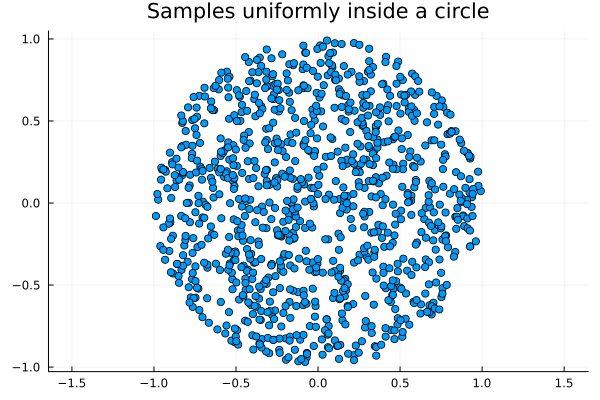

In [16]:
# Checking ball sampling
using Random
using Plots
import LinearAlgebra: diag, eigvals, I, cholesky, norm, Hermitian, dot, norm, logdet

include("src/pf_delta_perturbations.jl")

# Set parameters
center = [0.0, 0.0]  # center of the circle
radius = 1.0         # radius of the circle
num_samples = 1000   # number of samples

# Generate samples
samples = [sample_ball(center, radius) for _ in 1:num_samples]

# Split samples into x and y for plotting
x_vals = [s[1] for s in samples]
y_vals = [s[2] for s in samples]

# Plot
scatter(x_vals, y_vals, aspect_ratio=1, label="", title="Samples uniformly inside a circle")

In [17]:
# where is updata_data!?

net = PM.parse_matpower("pglib/pglib_opf_case5_pjm.m")
net["branch"]["1"]["br_status"] = 0
result = PM.run_ac_opf(net, Ipopt.Optimizer)
PM.update_data!(net, result["solution"])
PM.export_matpower("trial.m", net)

[info | PowerModels]: extending matpower format with data: areas 1x3
[info | PowerModels]: removing 1 cost terms from generator 4: [4000.0, 0.0]
[info | PowerModels]: removing 1 cost terms from generator 1: [1400.0, 0.0]
[info | PowerModels]: removing 1 cost terms from generator 5: [1000.0, 0.0]
[info | PowerModels]: removing 1 cost terms from generator 2: [1500.0, 0.0]
[info | PowerModels]: removing 1 cost terms from generator 3: [3000.0, 0.0]
This is Ipopt version 3.13.4, running with linear solver mumps.
NOTE: Other linear solvers might be more efficient (see Ipopt documentation).

Number of nonzeros in equality constraint Jacobian...:      131
Number of nonzeros in inequality constraint Jacobian.:       40
Number of nonzeros in Lagrangian Hessian.............:      220

Total number of variables............................:       40
                     variables with only lower bounds:        0
                variables with lower and upper bounds:       35
                     va

In [18]:
function fix_branch_flows!(net)
    branch_data = net["branch"]
    for (branch_id, branch) in branch_data
        if branch["br_status"] == 0
            for key in ["pt", "pf", "qt", "qf"]
                if !haskey(branch, key)
                    branch[key] = 0
                end
            end
        end
    end
end

fix_branch_flows!(net)
PM.export_matpower("trial_1.m", net)

In [19]:
net["branch"]["3"]

Dict{String, Any} with 23 entries:
  "br_r"        => 0.00064
  "rate_a"      => 4.26
  "shift"       => 0.0
  "pt"          => 0.216587
  "rate_b"      => 4.26
  "br_x"        => 0.0064
  "rate_c"      => 4.26
  "g_to"        => 0.0
  "g_fr"        => 0.0
  "source_id"   => Any["branch", 3]
  "b_fr"        => 0.01563
  "f_bus"       => 1
  "br_status"   => 1
  "t_bus"       => 5
  "b_to"        => 0.01563
  "index"       => 3
  "qf"          => 1.31053
  "angmin"      => -0.523599
  "angmax"      => 0.523599
  ⋮             => ⋮

In [20]:
# Case 14: create disconnected graph
net = PM.parse_file("pglib/pglib_opf_case14_ieee.m")
net["branch"]["14"]["br_status"] = 0
net["branch"]["14"]

[info | PowerModels]: removing 3 cost terms from generator 4: Float64[]
[info | PowerModels]: removing 1 cost terms from generator 1: [792.0951, 0.0]
[info | PowerModels]: removing 3 cost terms from generator 5: Float64[]
[info | PowerModels]: removing 1 cost terms from generator 2: [2326.9494, 0.0]
[info | PowerModels]: removing 3 cost terms from generator 3: Float64[]


Dict{String, Any} with 19 entries:
  "br_r"        => 0.0
  "rate_a"      => 1.67
  "shift"       => 0.0
  "rate_b"      => 1.67
  "br_x"        => 0.17615
  "rate_c"      => 1.67
  "g_to"        => 0.0
  "g_fr"        => 0.0
  "source_id"   => Any["branch", 14]
  "b_fr"        => 0.0
  "f_bus"       => 7
  "br_status"   => 0
  "t_bus"       => 8
  "b_to"        => 0.0
  "index"       => 14
  "angmin"      => -0.523599
  "angmax"      => 0.523599
  "transformer" => false
  "tap"         => 1.0

In [21]:
pm = PM.instantiate_model(net, PM.ACPPowerModel, PM.build_opf)
result = PM.optimize_model!(pm, optimizer=Ipopt.Optimizer)
result

This is Ipopt version 3.13.4, running with linear solver mumps.
NOTE: Other linear solvers might be more efficient (see Ipopt documentation).

Number of nonzeros in equality constraint Jacobian...:      465
Number of nonzeros in inequality constraint Jacobian.:      152
Number of nonzeros in Lagrangian Hessian.............:      837

Total number of variables............................:      111
                     variables with only lower bounds:        0
                variables with lower and upper bounds:       97
                     variables with only upper bounds:        0
Total number of equality constraints.................:      105
Total number of inequality constraints...............:       76
        inequality constraints with only lower bounds:       19
   inequality constraints with lower and upper bounds:        0
        inequality constraints with only upper bounds:       57

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
   0  

Dict{String, Any} with 8 entries:
  "solve_time"         => 0.020653
  "optimizer"          => "Ipopt"
  "termination_status" => LOCALLY_SOLVED
  "dual_status"        => FEASIBLE_POINT
  "primal_status"      => FEASIBLE_POINT
  "objective"          => 2179.05
  "solution"           => Dict{String, Any}("baseMVA"=>100.0, "branch"=>Dict{St…
  "objective_lb"       => -Inf

In [22]:
result["solution"]["gen"]["5"]

Dict{String, Any} with 2 entries:
  "qg" => -6.27144e-29
  "pg" => 0.0

In [23]:
# Experiment: see if is_graph_connected works
net = PM.parse_file("pglib/pglib_opf_case14_ieee.m")
net["branch"]["14"]["br_status"] = 0
is_graph_connected(net)

[info | PowerModels]: removing 3 cost terms from generator 4: Float64[]
[info | PowerModels]: removing 1 cost terms from generator 1: [792.0951, 0.0]
[info | PowerModels]: removing 3 cost terms from generator 5: Float64[]
[info | PowerModels]: removing 1 cost terms from generator 2: [2326.9494, 0.0]
[info | PowerModels]: removing 3 cost terms from generator 3: Float64[]


false

In [24]:
bad_net = JSON.parsefile("sample_42.json")
net = bad_net["network"]
is_graph_connected(net)

false

In [27]:
new_net = PM.parse_file("cpf_data/sample_12094.m")
is_graph_connected(new_net)

[info | PowerModels]: removing 2 cost terms from generator 1: Float64[]
[info | PowerModels]: removing 2 cost terms from generator 6: Float64[]
[info | PowerModels]: removing 2 cost terms from generator 7: Float64[]


true

In [35]:
pf_solution = PM.compute_ac_pf(new_net)

Dict{String, Any} with 5 entries:
  "optimizer"          => "NLsolve"
  "termination_status" => true
  "objective"          => 0.0
  "solution"           => Dict{String, Any}("gen"=>Dict{String, Any}("4"=>Dict(…
  "solve_time"         => 0.0047791